In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('aadr_us.csv',index_col="Date",parse_dates=True)


In [4]:
dataset.tail()


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-11-06,57.61,57.7372,57.2285,57.6500,41601,0
2017-11-07,57.29,57.3460,57.1446,57.2850,50935,0
2017-11-08,57.31,57.5500,57.2200,57.4900,71770,0
2017-11-09,57.23,57.2300,56.7100,56.9265,53130,0
2017-11-10,56.96,56.9600,56.3909,56.4000,29233,0


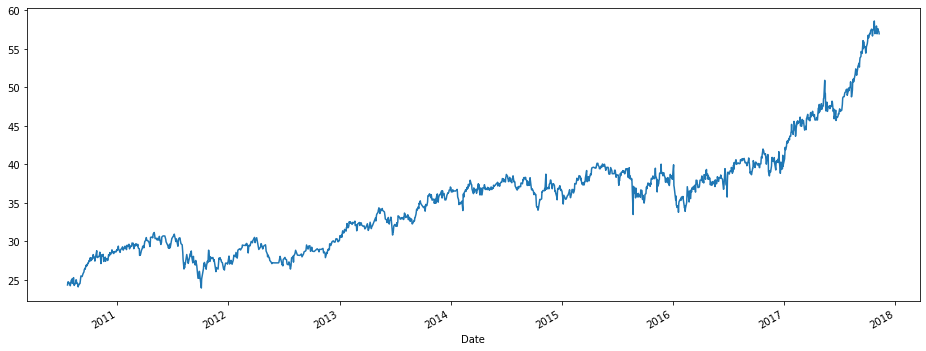

In [5]:
dataset['Open'].plot(figsize=(16,6))

In [6]:
Xtrain = dataset[:1200]

In [7]:
Xtrain

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321,0
2010-07-22,24.644,24.644,24.362,24.487,18031,0
2010-07-23,24.759,24.759,24.314,24.507,8897,0
2010-07-26,24.624,24.624,24.449,24.595,19443,0
2010-07-27,24.477,24.517,24.431,24.517,8456,0
...,...,...,...,...,...,...
2016-05-10,37.765,37.766,37.622,37.766,853,0
2016-05-11,37.744,37.763,37.639,37.763,2584,0
2016-05-12,37.525,37.604,37.471,37.604,1777,0


In [8]:
Xtest = dataset[1200:]

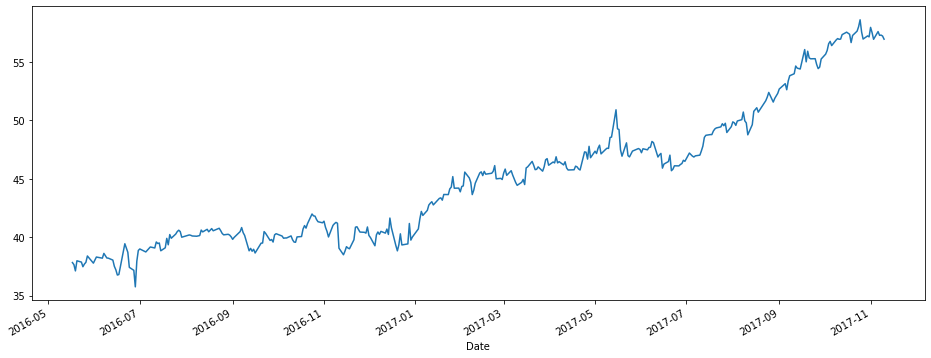

In [9]:
Xtest['Open'].plot(figsize=(16,6))

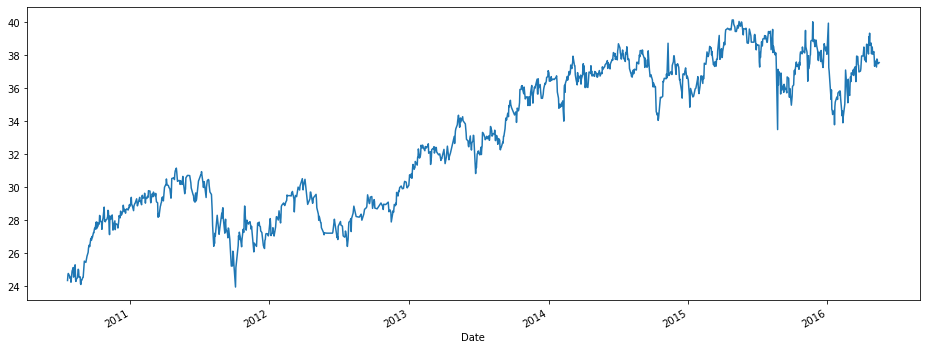

In [10]:
Xtrain['Open'].plot(figsize=(16,6))

In [11]:
dataset = Xtrain

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2010-07-21 to 2016-05-16
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1200 non-null   float64
 1   High     1200 non-null   float64
 2   Low      1200 non-null   float64
 3   Close    1200 non-null   float64
 4   Volume   1200 non-null   int64  
 5   OpenInt  1200 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 65.6 KB


In [14]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-22,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-23,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-26,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-27,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-28,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-29,24.548714,24.560143,24.301429,24.391286,14907.571429,0.0
2010-07-30,24.533714,24.560143,24.341714,24.446571,8807.142857,0.0
2010-08-02,24.572571,24.600429,24.384857,24.496857,7254.285714,0.0


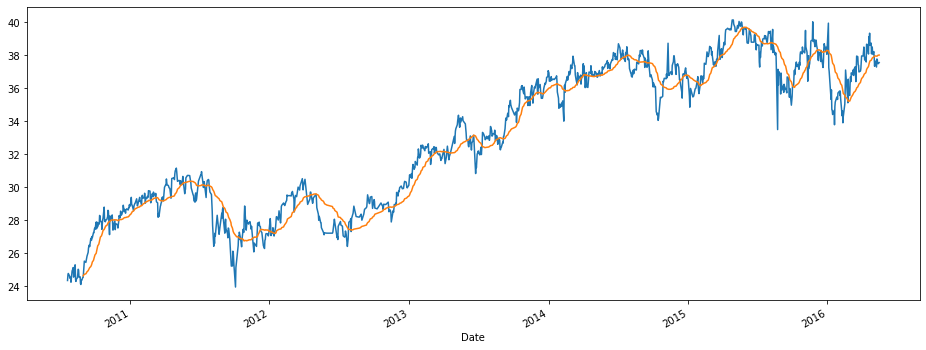

In [15]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

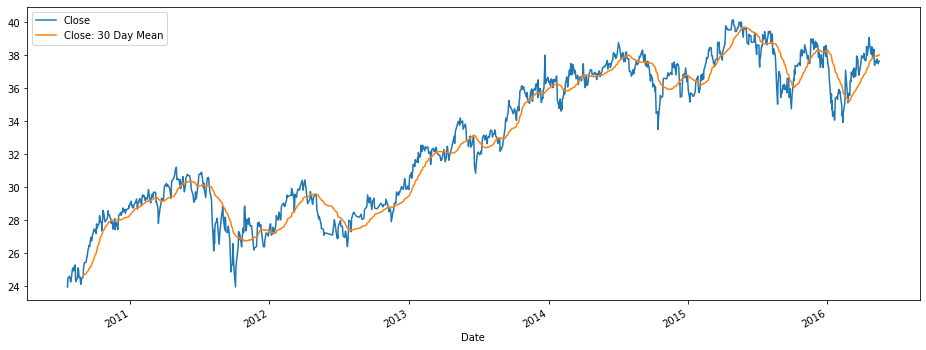

In [16]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

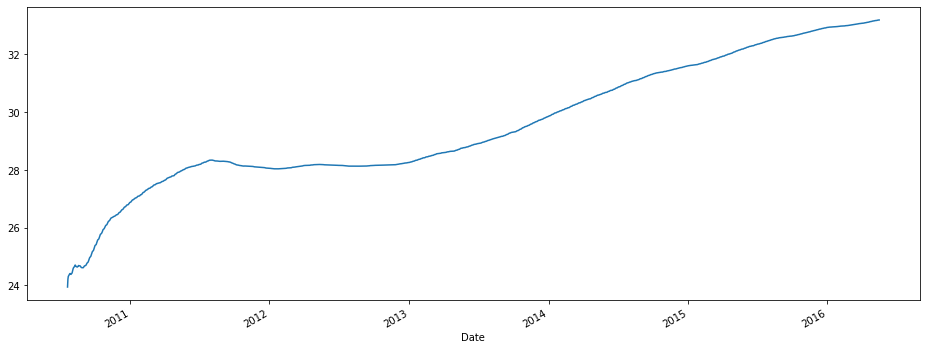

In [17]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [18]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [19]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [21]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [23]:
# Initialising the RNN
regressor = Sequential()



In [24]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [25]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
36/36 [==============================] - 6s 162ms/step - loss: 0.0626
Epoch 2/100
36/36 [==============================] - 6s 161ms/step - loss: 0.0095
Epoch 3/100
36/36 [==============================] - 6s 170ms/step - loss: 0.0092
Epoch 4/100
36/36 [==============================] - 6s 167ms/step - loss: 0.0075
Epoch 5/100
36/36 [==============================] - 6s 160ms/step - loss: 0.0074
Epoch 6/100
36/36 [==============================] - 6s 179ms/step - loss: 0.0071 0s - loss: 0.00
Epoch 7/100
36/36 [==============================] - 6s 171ms/step - loss: 0.0071
Epoch 8/100
36/36 [==============================] - 6s 168ms/step - loss: 0.0067
Epoch 9/100
36/36 [==============================] - 6s 156ms/step - loss: 0.0070
Epoch 10/100
36/36 [==============================] - 6s 158ms/step - loss: 0.0064
Epoch 11/100
36/36 [==============================] - 6s 168ms/step - loss: 0.0062
Epoch 12/100
36/36 [==============================] - 6s 159ms/step - loss: 0.00

36/36 [==============================] - 5s 146ms/step - loss: 0.0022
Epoch 100/100
36/36 [==============================] - 5s 142ms/step - loss: 0.0021


In [26]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = Xtest



In [27]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_test.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2016-05-17,37.832,37.832,37.832,37.832,191,0
2016-05-18,37.653,37.653,37.555,37.555,887,0
2016-05-19,37.118,37.238,36.568,36.873,6938,0
2016-05-20,37.984,37.984,37.984,37.984,303,0
2016-05-23,37.872,37.999,37.250,37.357,3314,0


In [29]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [44]:
len(test_set)

365

In [50]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 425):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [51]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       365 non-null    float32
dtypes: float32(1)
memory usage: 1.6 KB


In [52]:
print(len(predicted_stock_price))
predicted_stock_price


365


,0
0,37.316654
1,37.367115
2,37.410835
3,37.262314
4,37.318897
...,...
360,47.880814
361,48.109814
362,48.043510
363,48.069042


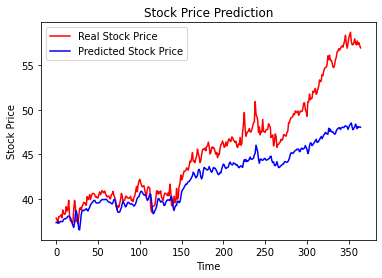

In [53]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


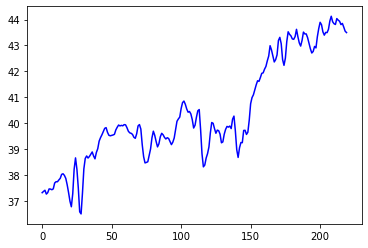

In [38]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.show()

In [75]:
predicted_stock_price = regressor.predict(X_test[200:201])
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [61]:
len(X_test[0])

60

In [63]:
X_test[0].shape

(60, 1)

In [76]:
predicted_stock_price

array([[43.893246]], dtype=float32)

In [79]:
real_stock_price[201]

array([45.788])